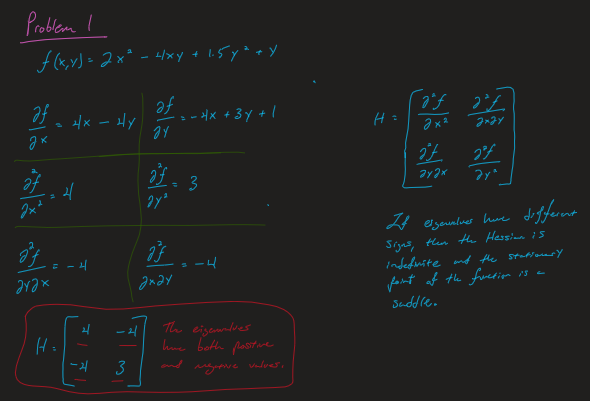


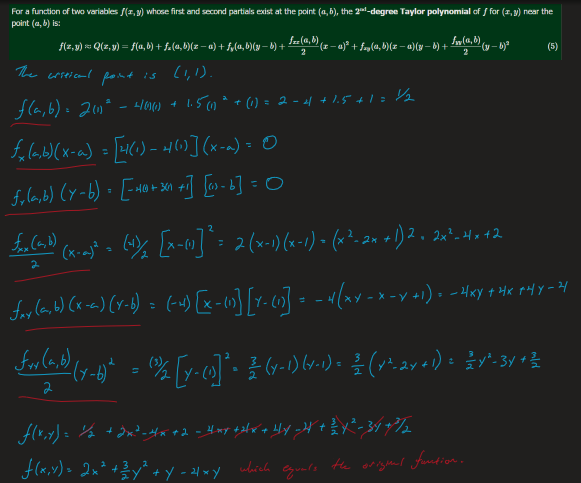

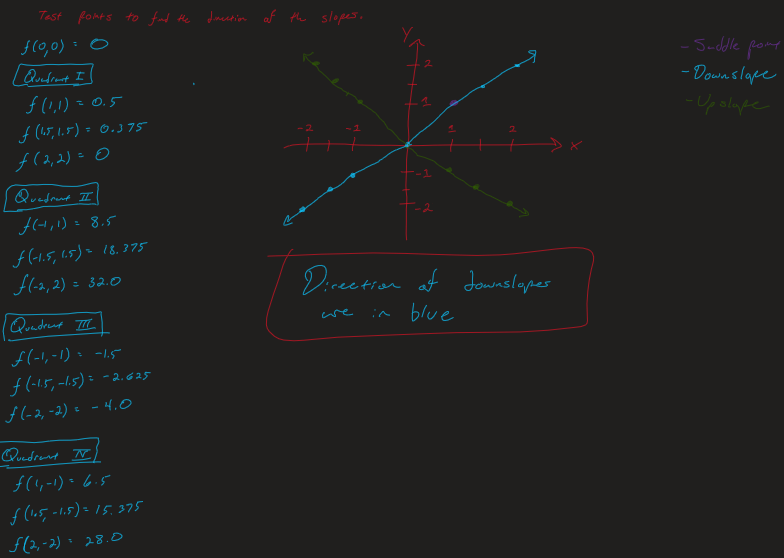

Problem I
Hessian matrix of the function 2*x**2 - 4*x*y + 1.5*y**2 + y = 
 [[4 -4]
 [-4 3.00000000000000]]
The critical point is {x: 1.00000000000000, y: 1.00000000000000}

Downslopes of saddle
f(-2.0,-2.0) = -4.0
f(-1.5,-1.5) = -2.625
f(-1.0,-1.0) = -1.5
f(-0.5,-0.5) = -0.625
f(0.0,0.0) = 0.0
f(0.5,0.5) = 0.375
f(1.0,1.0) = 0.5
f(1.5,1.5) = 0.375
f(2.0,2.0) = 0.0


Upslopes of saddle
f(2.0,-2.0) = 28.0
f(1.5,-1.5) = 15.375
f(1.0,-1.0) = 6.5
f(0.5,-0.5) = 1.375
f(-0.0,0.0) = 0.0
f(-0.5,0.5) = 2.375
f(-1.0,1.0) = 8.5
f(-1.5,1.5) = 18.375
f(-2.0,2.0) = 32.0


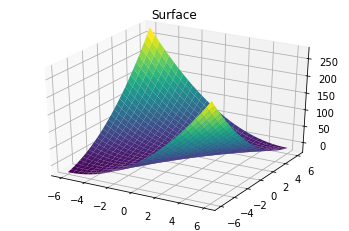

____________________


In [6]:
import numpy as np
import sympy as sp
from sympy import symbols, Eq, solve
from numpy import linalg as la
from numpy.linalg import inv
import math

from mpl_toolkits import mplot3d  # Plot function to verify answers
import matplotlib.pyplot as plt


x, y, z = sp.symbols('x y z')


# Problem I
def partial(element, function):
    # The diff function is from the sympy library
    # It takes the derivative of the input function using...
    # the variable input
    # https://docs.sympy.org/latest/tutorial/calculus.html
    partial_diff = function.diff(element)
    return partial_diff


def gradient_to_zero(symbols_list, partials):
    partial_x = Eq(partials[0], 0)
    partial_y = Eq(partials[1], 0)

    # The function "solve" solves for the unknown variable(s) in the...
    # given function(s)
    # https://problemsolvingwithpython.com/10-Symbolic-Math/10.06-Solving-Equations/
    singular = solve((partial_x, partial_y),
                     (symbols_list[0], symbols_list[1]))

    return singular


def hessian(partials_second, cross_derivatives):
    # Create the Hessian Matrix for the original function using...
    # the matrix function
    # https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
    hessianmat = np.matrix([[partials_second[0], cross_derivatives],
                            [cross_derivatives, partials_second[1]]])

    return hessianmat


def taylor_series_approximation(x, y):
    # Second half of problem I
    # Find the direction of the downslopes away from the...
    # saddle (Use Taylor's Expansion at the saddle point).
    # Find directions that reduce f
    taylor_approx = 0
    a = 1  # Saddle Point x
    b = 1  # Saddle Point y
    func = 2*a**2 - 4*a*b + 1.5*b**2 + b
    first_deriv_x = (4*a - 4*b)*(x-a)
    first_deriv_y = (-4*a + 3*b + 1)*(y-b)
    second_deriv_x = (4/2)*(x-a)**2
    second_deriv_y = (3/2)*(y-b)**2
    second_deriv_xy = (-4)*(x-a)*(y-b)
    taylor_approx = func + first_deriv_x + first_deriv_y + \
        second_deriv_x + second_deriv_y + second_deriv_xy

    return taylor_approx


def problem_I():
    print("Problem I")
    x, y = symbols('x y')  # Used for symbolic calculations
    symbols_list = [x, y]  # Used in the partial function
    # Empty arrays to hold the first partial derivative and
    # the second partial derivative
    partials, partials_second = [], []
    function = 2*x**2 - 4*x*y + 1.5*y**2 + y

    # Using x as the first element, call "partial" using x and...
    # the current function as the inputs
    # Append the result to the array partials
    for element in symbols_list:
        partial_diff = partial(element, function)
        partials.append(partial_diff)
    first_derivs = partials

    # Calculates the second partial derivatives of the function...
    # for the diagonal Hessian Matrix
    # Assuming the Hessian is symmetric
    cross_derivatives = partial(symbols_list[0], partials[1])

    # Repeat the process as above using the first partial derivatives currently...
    # in the partial_diff variable
    # Overwrite the partial_diff array with the second partial derivatives by ...
    # calling "partial" again.
    for i in range(0, len(symbols_list)):
        partial_diff = partial(symbols_list[i], partials[i])
        partials_second.append(partial_diff)

    # Create the Hessian Matrix for the input function
    hessianmat = hessian(partials_second, cross_derivatives)

    print("Hessian matrix of the function {0} = \n {1}".format(
        function, hessianmat))
    print("The critical point is "
          + str(gradient_to_zero(symbols_list, partials)) + "\n")

    # Print the taylor series expansion at the saddle point for arbitrary...
    # points in the 2d space to determine the downslopes & upslopes.
    # np.arange is just like range() except it can handle float steps
    # https://pynative.com/python-range-for-float-numbers/
    print("Downslopes of saddle")
    for i in np.arange(-2, 2.5, 0.5):
        print("f(" + str(i) + "," + str(i) + ") = "
              + str(taylor_series_approximation(i, i)))

    print("\n")
    print("Upslopes of saddle")
    for i in np.arange(-2, 2.5, 0.5):
        print("f(" + str(-i) + "," + str(i) + ") = "
              + str(taylor_series_approximation(-i, i)))

    # Plot function to verify visually
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    w = np.linspace(-6, 6, 30)
    q = np.linspace(-6, 6, 30)

    X, Y = np.meshgrid(w, q)
    z = 2*X**2 - 4*X*Y + 1.5*Y**2 + Y
    ax.plot_surface(X, Y, z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title('Surface')
    plt.show()

    print("____________________")

problem_I()

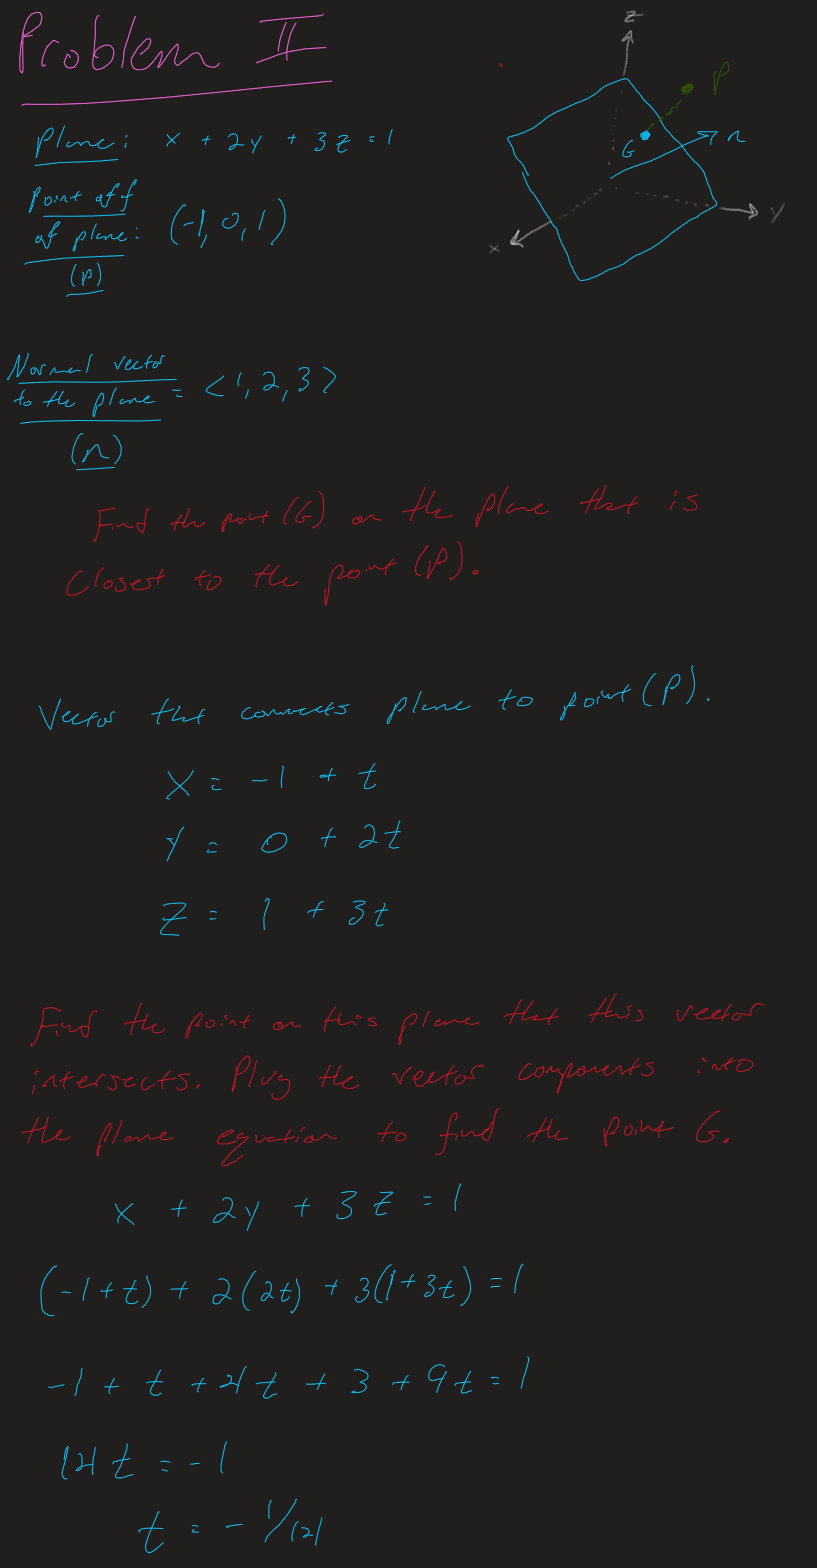

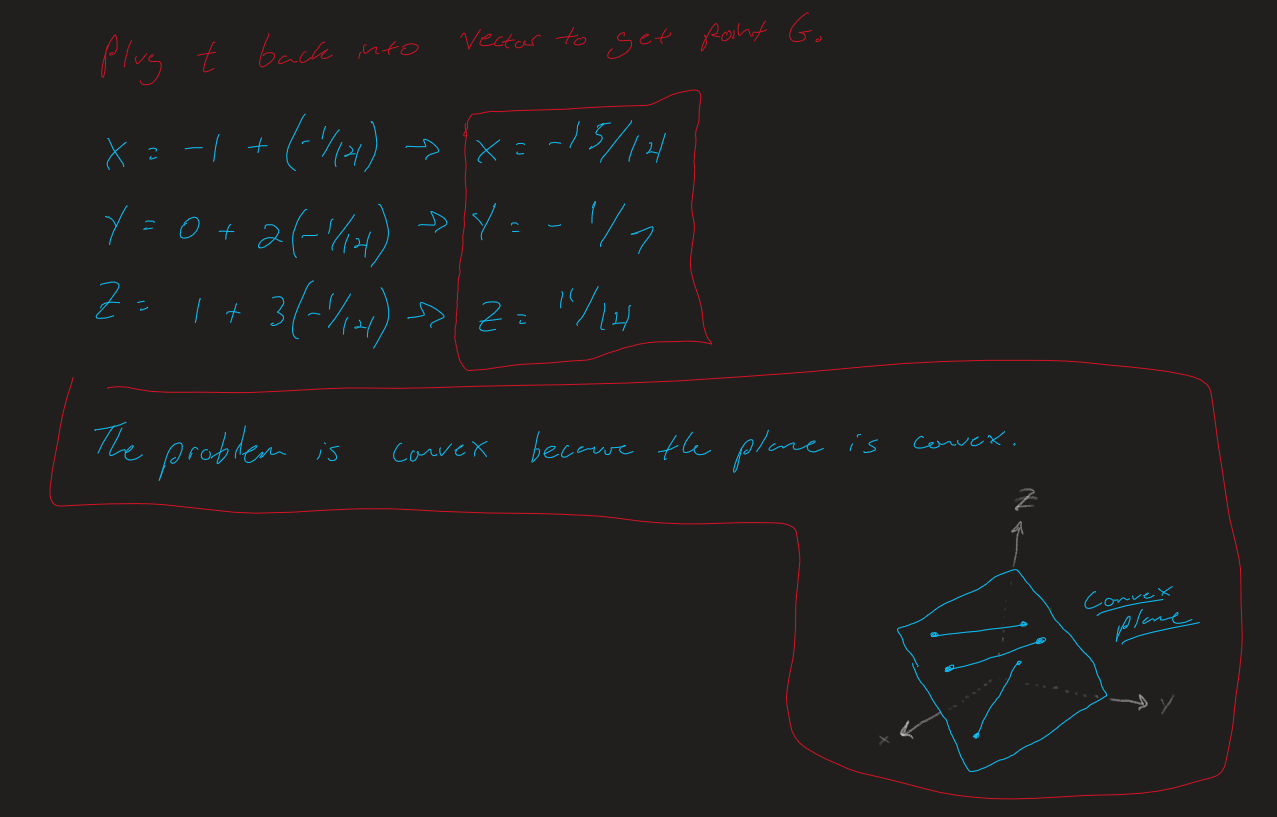

Problem II
Gradient Descent = [-1.0714285714285716, -0.14249959392645667, 0.7854759197604949]


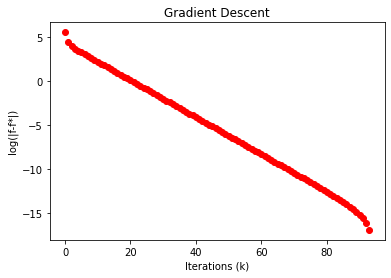

Newton's Method = [-1.0713847175176976, -0.14249567082708423, 0.785458686390622]


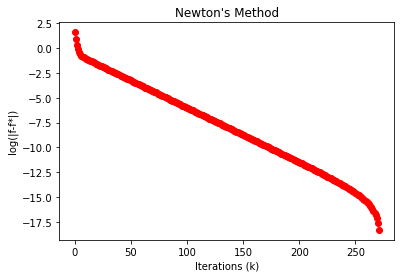

____________________


In [5]:
# Problem II
def gradient_descent():
    x, y = sp.symbols('x y')
    eps = 1e-3  # Termination criterion
    k = 0  # Counter

    # Function comes from the following equation:
    # min. (1 - 2x - 3y + 1)^2 + x^2 + (y - 1)^2
    # where x is x2
    # and y is x3
    # x1 is solved at the end when x2 and x3 are solved
    def function(x, y): return (1 - 2*x - 3*y + 1)**2 + x**2 + (y - 1)**2
    def partial_x(x, y): return 10*x + 12*y - 8
    def partial_y(x, y): return 12*x + 20*y - 14

    solution_x = [5]  # Initial guess x
    solution_y = [-7]  # Initial guess y
    # Calculate gradient using initial guesses to calculate initial error
    gradient = [partial_x(solution_x[0], solution_y[0]), partial_y(solution_x[0], solution_y[0])]

    # Calculate the norm of the 2D gradient at the initial guesses
    error = la.norm(gradient)


    a = 0.05
    while error >= eps:
        # Calculate next step using gradient descent algorithm
        solution_x.append(solution_x[k] - a*partial_x(solution_x[k], solution_y[k]))
        solution_y.append(solution_y[k] - a*partial_y(solution_x[k], solution_y[k]))

        # Update gradient norm and calculate new error using new x,y position
        gradient = [partial_x(solution_x[k], solution_y[k]), partial_y(solution_x[k], solution_y[k])]
        error = la.norm(gradient)
        k += 1  # Increase counter

    # Solution for x1 now that x2 and x3 are solved for
    solution_x1 = 1 - 2*solution_x[k] - 3*solution_y[k]

    soln = [solution_x1, solution_x[k], solution_y[k]]
    print("Gradient Descent = " + str(soln))
    # print(k)
    # This solution matches what I calculated in part I of this problem.

    # Plot log-linear convergence plot
    f = function(solution_x[0], solution_y[0])
    f_star = function(solution_x[k], solution_y[k])

    for i in range(k):
        plt.plot(i, math.log(abs(function(solution_x[i], solution_y[i]) - f_star)), 'ro')
    plt.ylabel('log(|f-f*|)')
    plt.xlabel('Iterations (k)')
    plt.title('Gradient Descent')
    plt.show()


# Newton algorithm
def newton():
    x, y = sp.symbols('x y')
    eps = 1e-3  # Termination criterion
    k = 0  # Counter

    # Function comes from the following equation:
    # min. (1 - 2x - 3y + 1)^2 + x^2 + (y - 1)^2
    # where x is x2
    # and y is x3
    # x1 is solved at the end when x2 and x3 are solved
    def function(x, y): return (1 - 2*x - 3*y + 1)**2 + x**2 + (y - 1)**2
    def partial_x(x, y): return 10*x + 12*y - 8
    def partial_y(x, y): return 12*x + 20*y - 14
    second_partial_xx = 10
    second_partial_yy = 20
    second_partial_xy = 12
    H = [[second_partial_xx, second_partial_xy], [second_partial_xy, second_partial_yy]]

    solution_x = [0]  # Initial guess x
    solution_y = [0]  # Initial guess y
    # Calculate gradient using initial guesses to calculate initial error
    gradient = [partial_x(solution_x[0], solution_y[0]), partial_y(solution_x[0], solution_y[0])]

    # Calculate the norm of the 2D gradient at the initial guesses
    error = la.norm(gradient)


    a = 0.05
    while error >= eps:
        # Calculate next step using Newton's algorithm
        # The xx portion of the inverse hessian was used for x and
        # the yy portion of the inverse hessian was used for y
        solution_x.append(solution_x[k] - a*(inv(H)[0][0])*partial_x(solution_x[k], solution_y[k]))
        solution_y.append(solution_y[k] - a*(inv(H)[1][1])*partial_y(solution_x[k], solution_y[k]))

        # Update gradient norm and calculate new error using new x,y position
        gradient = [partial_x(solution_x[k], solution_y[k]), partial_y(solution_x[k], solution_y[k])]
        error = la.norm(gradient)
        k += 1  # Increase counter

    # Solution for x1 now that x2 and x3 are solved for
    solution_x1 = 1 - 2*solution_x[k] - 3*solution_y[k]

    soln = [solution_x1, solution_x[k], solution_y[k]]
    print("Newton's Method = " + str(soln))
    # print(k)
    # This solution matches what I calculated in part I of this problem.

    # Plot log-linear convergence plot
    f = function(solution_x[0], solution_y[0])
    f_star = function(solution_x[k], solution_y[k])

    for i in range(k):
        plt.plot(i, math.log(abs(function(solution_x[i], solution_y[i]) - f_star)), 'ro')
    plt.ylabel('log(|f-f*|)')
    plt.xlabel('Iterations (k)')
    plt.title('Newton\'s Method')
    plt.show()


def problem_II():
    print("Problem II")
    gradient_descent()
    newton()
    print("____________________")

problem_II()

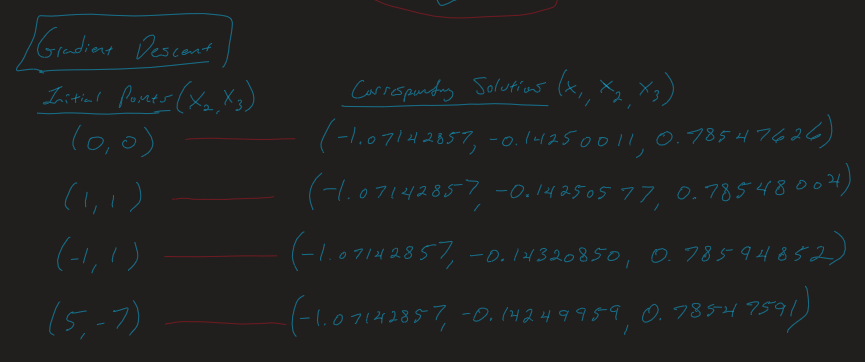

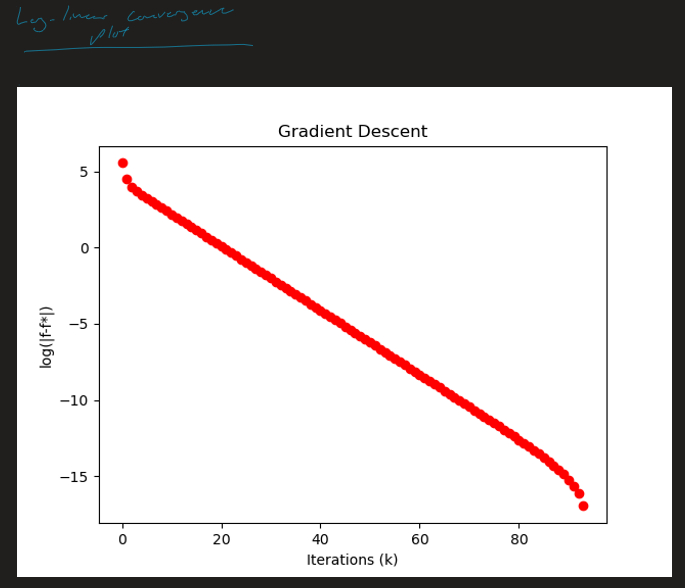

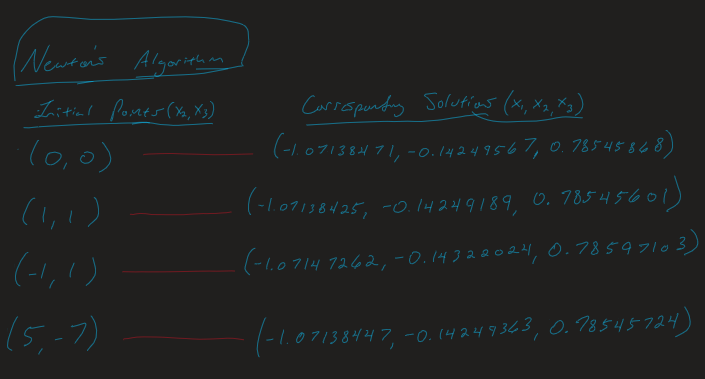

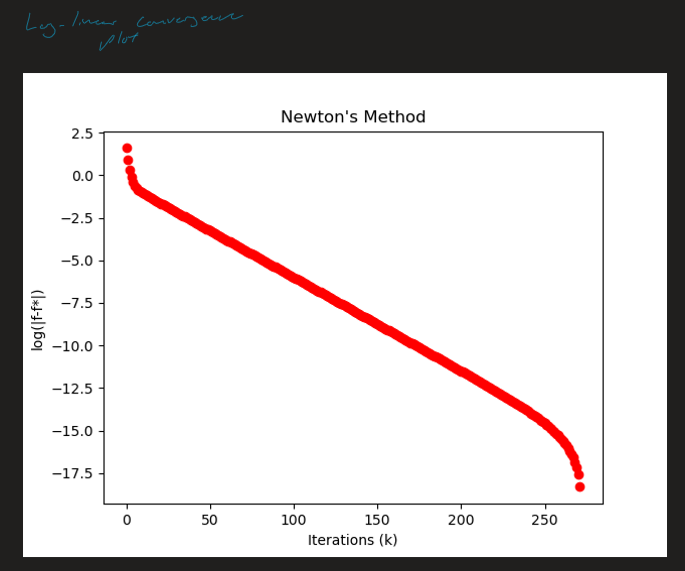

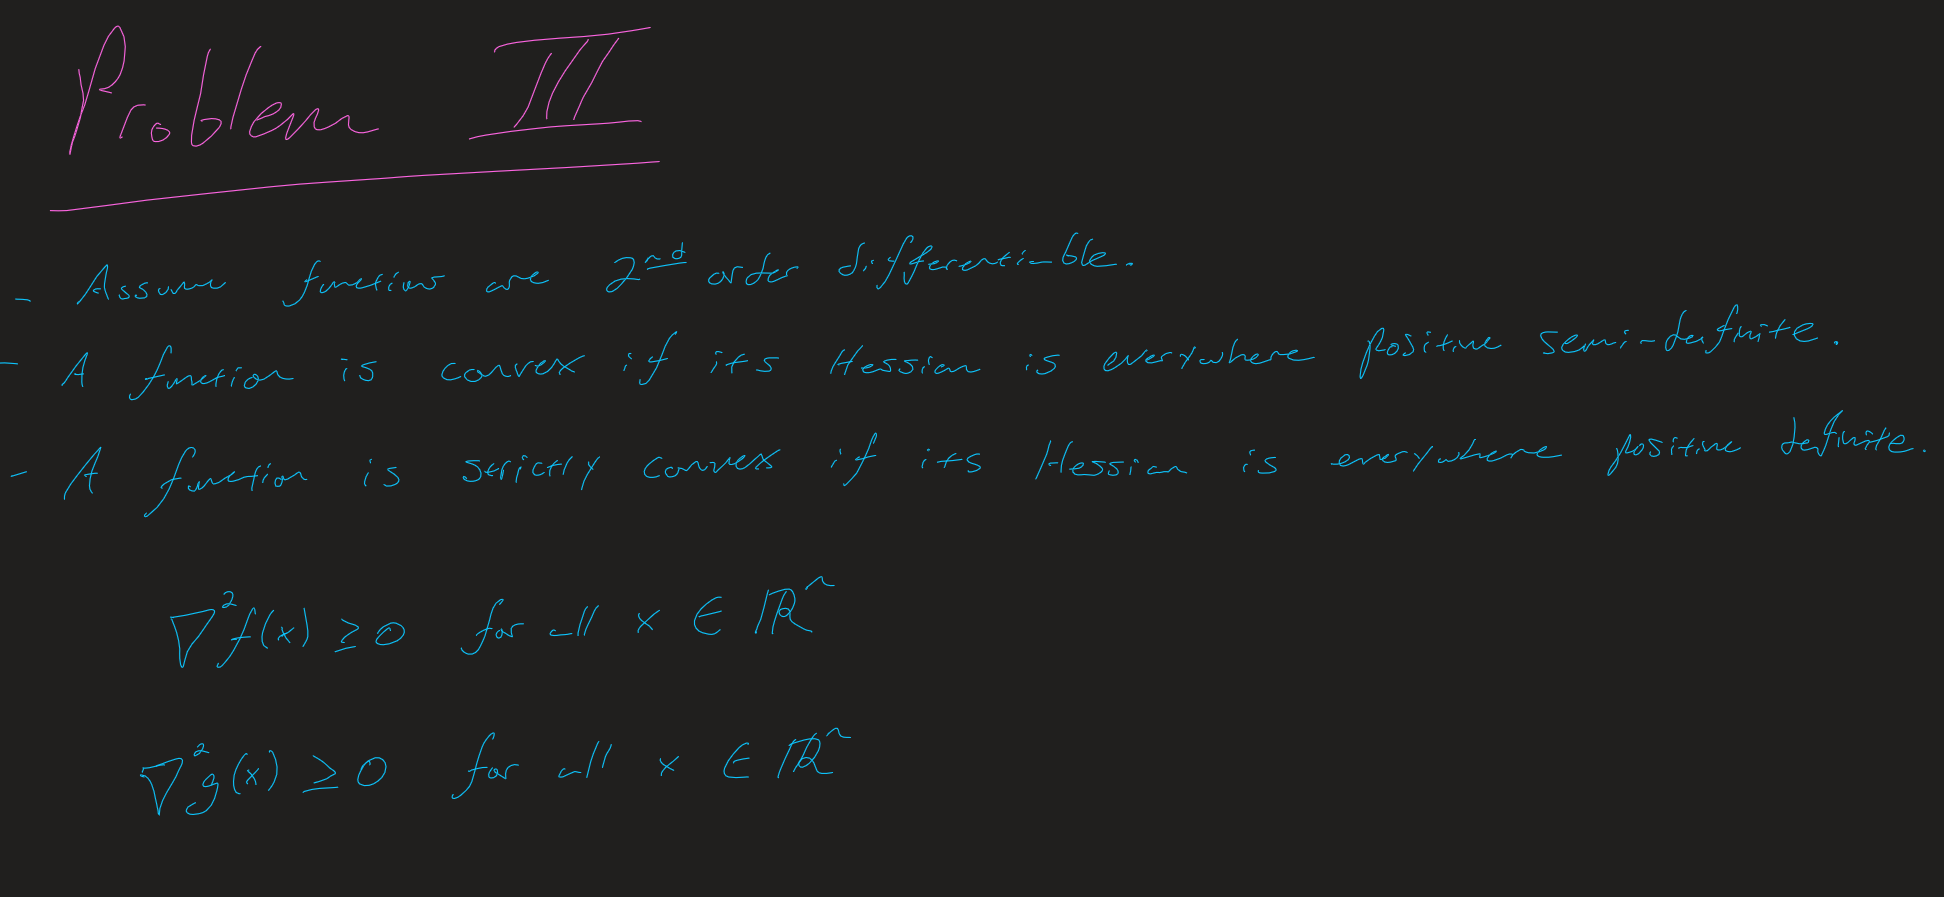

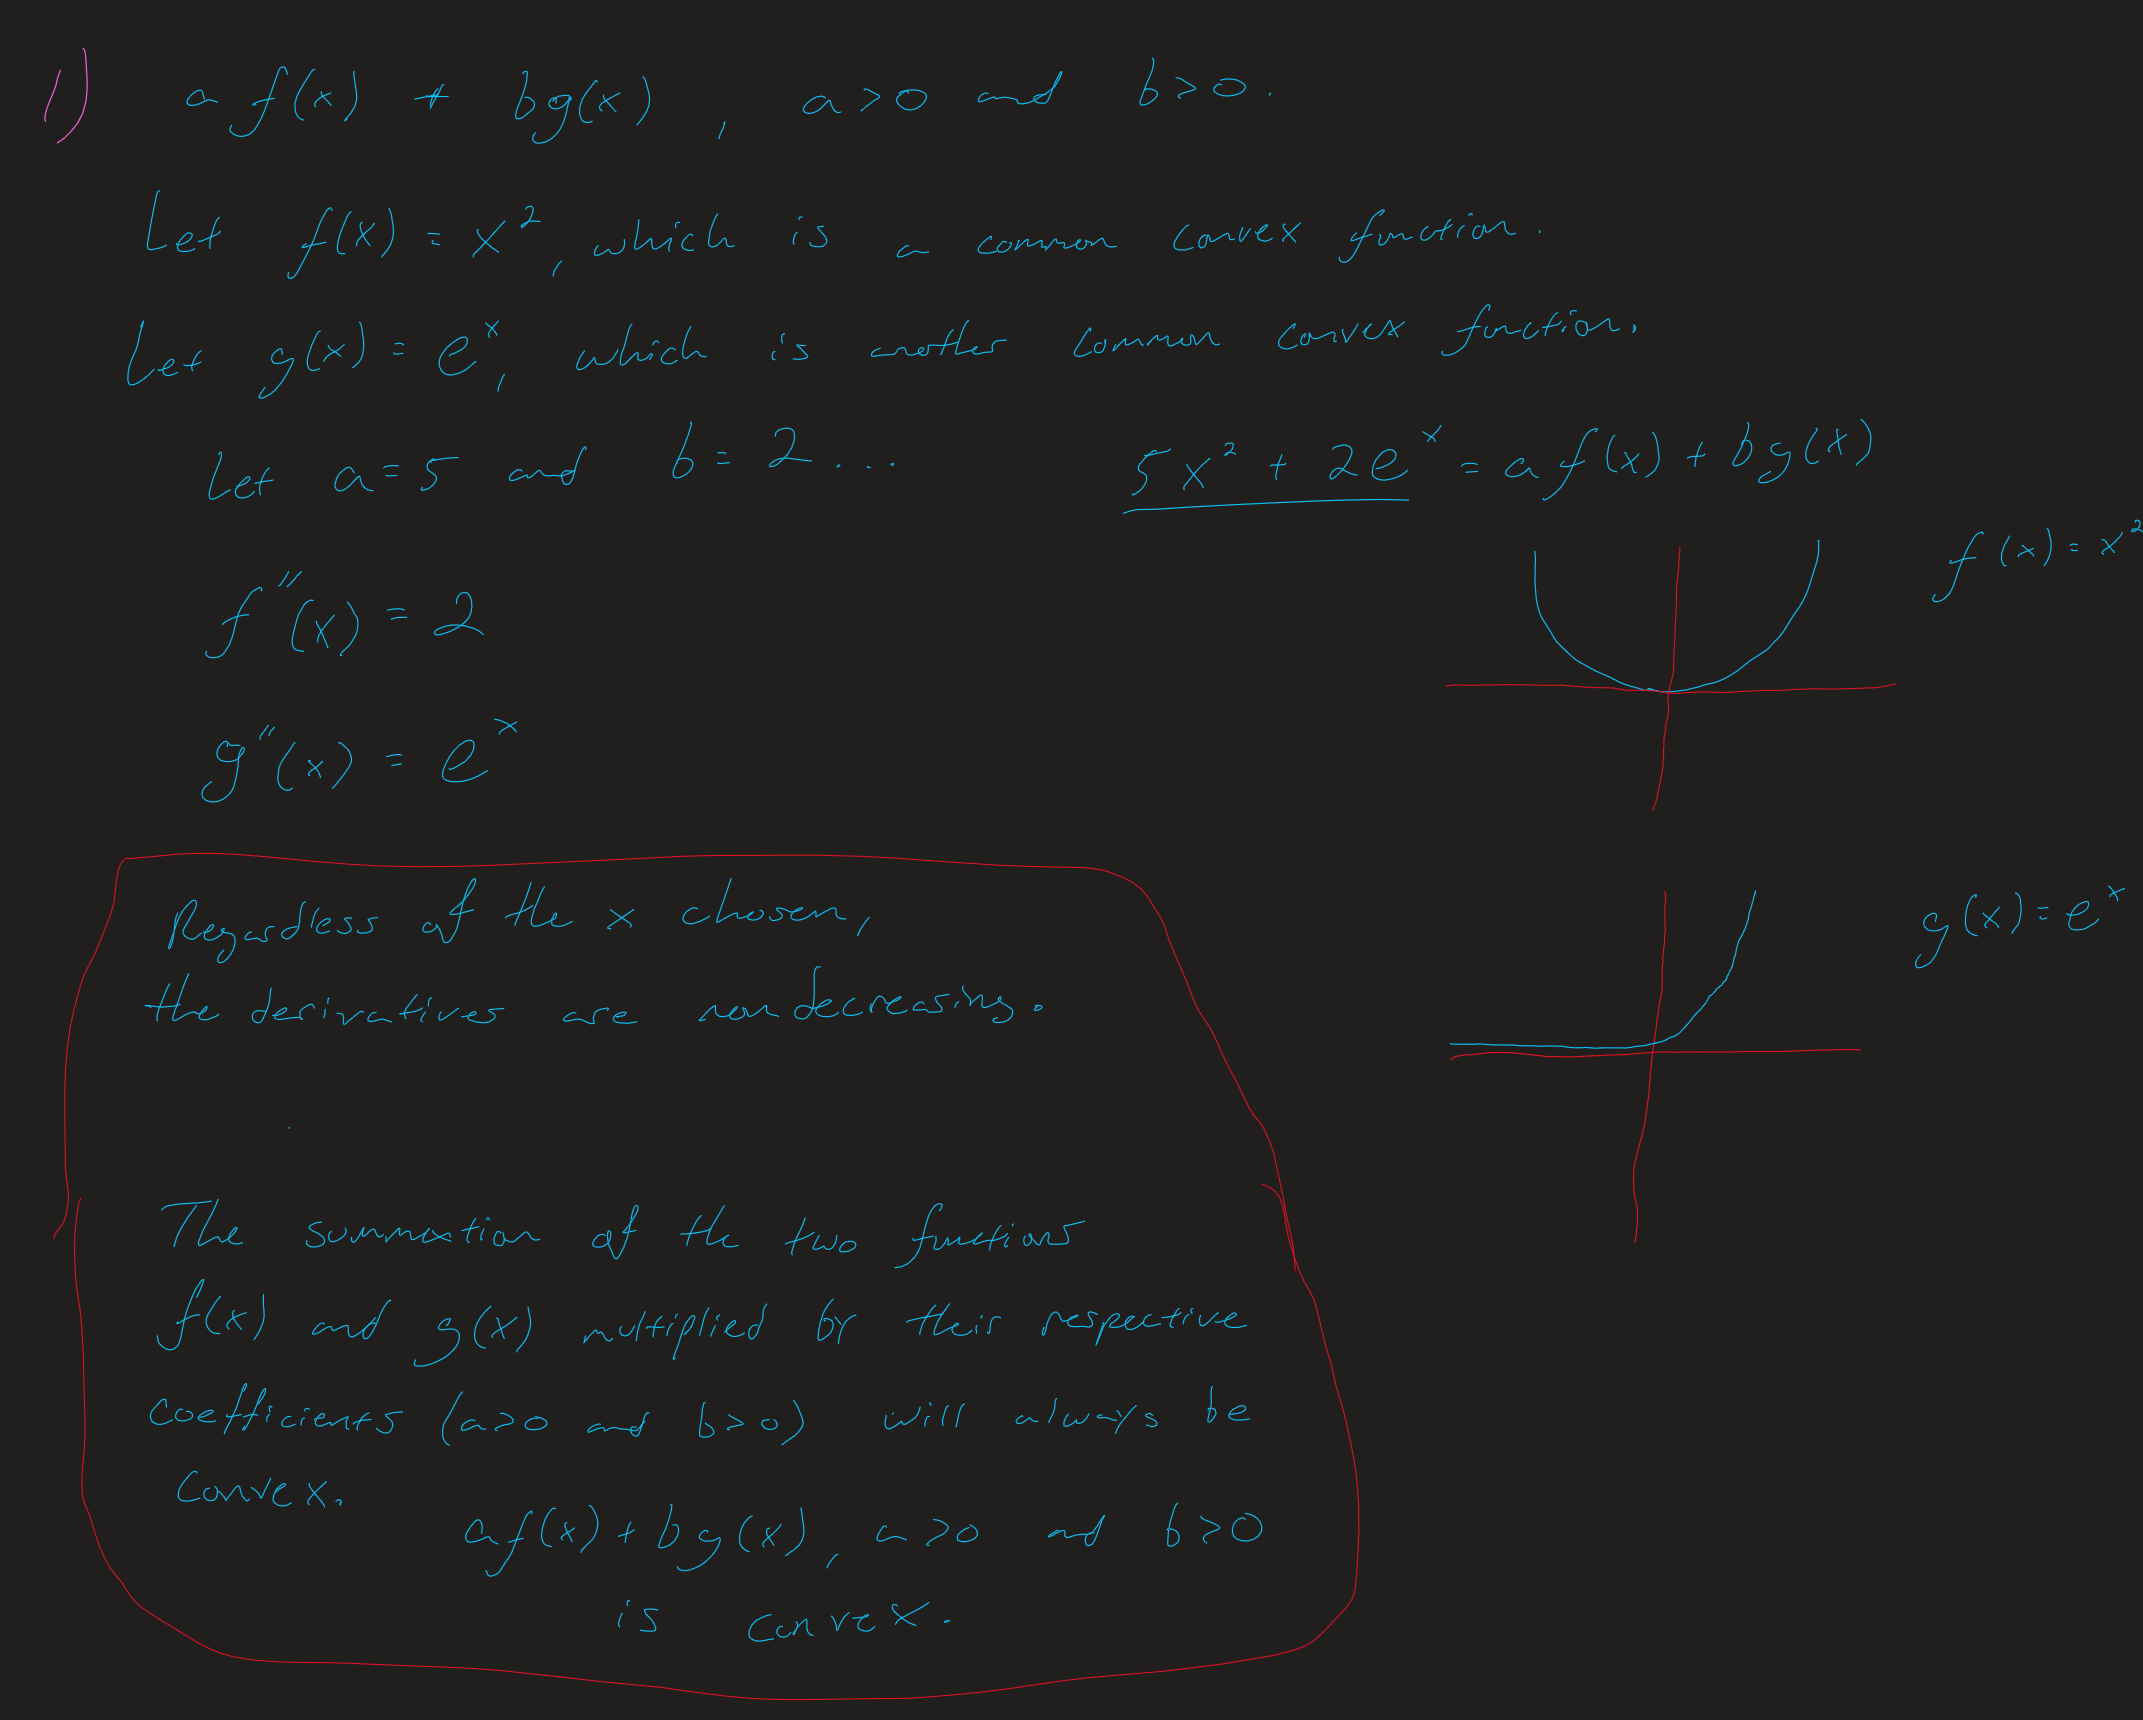

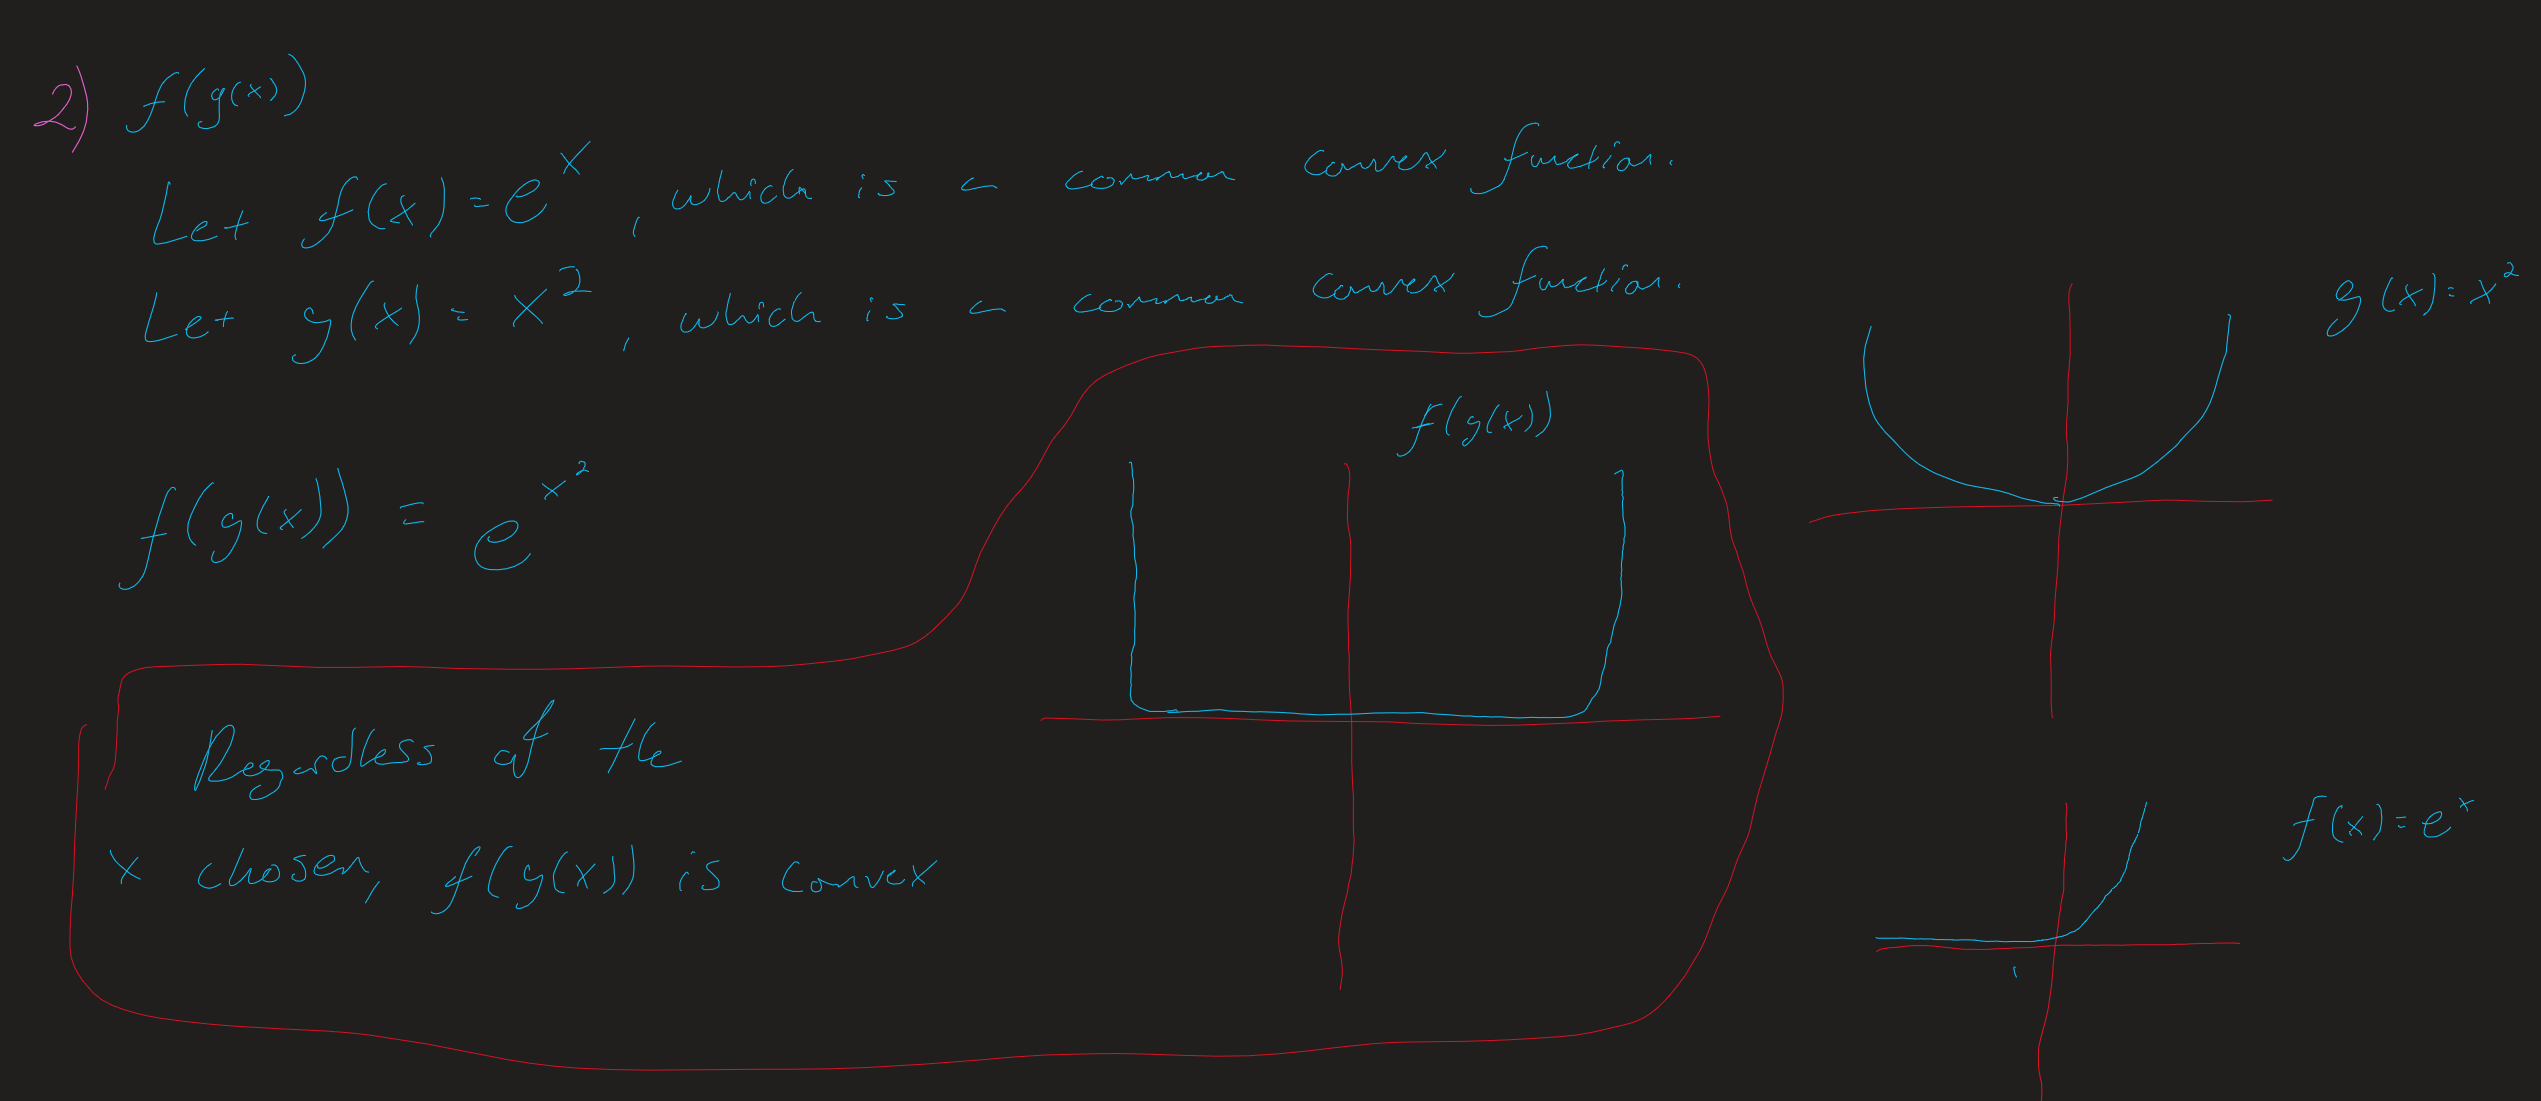

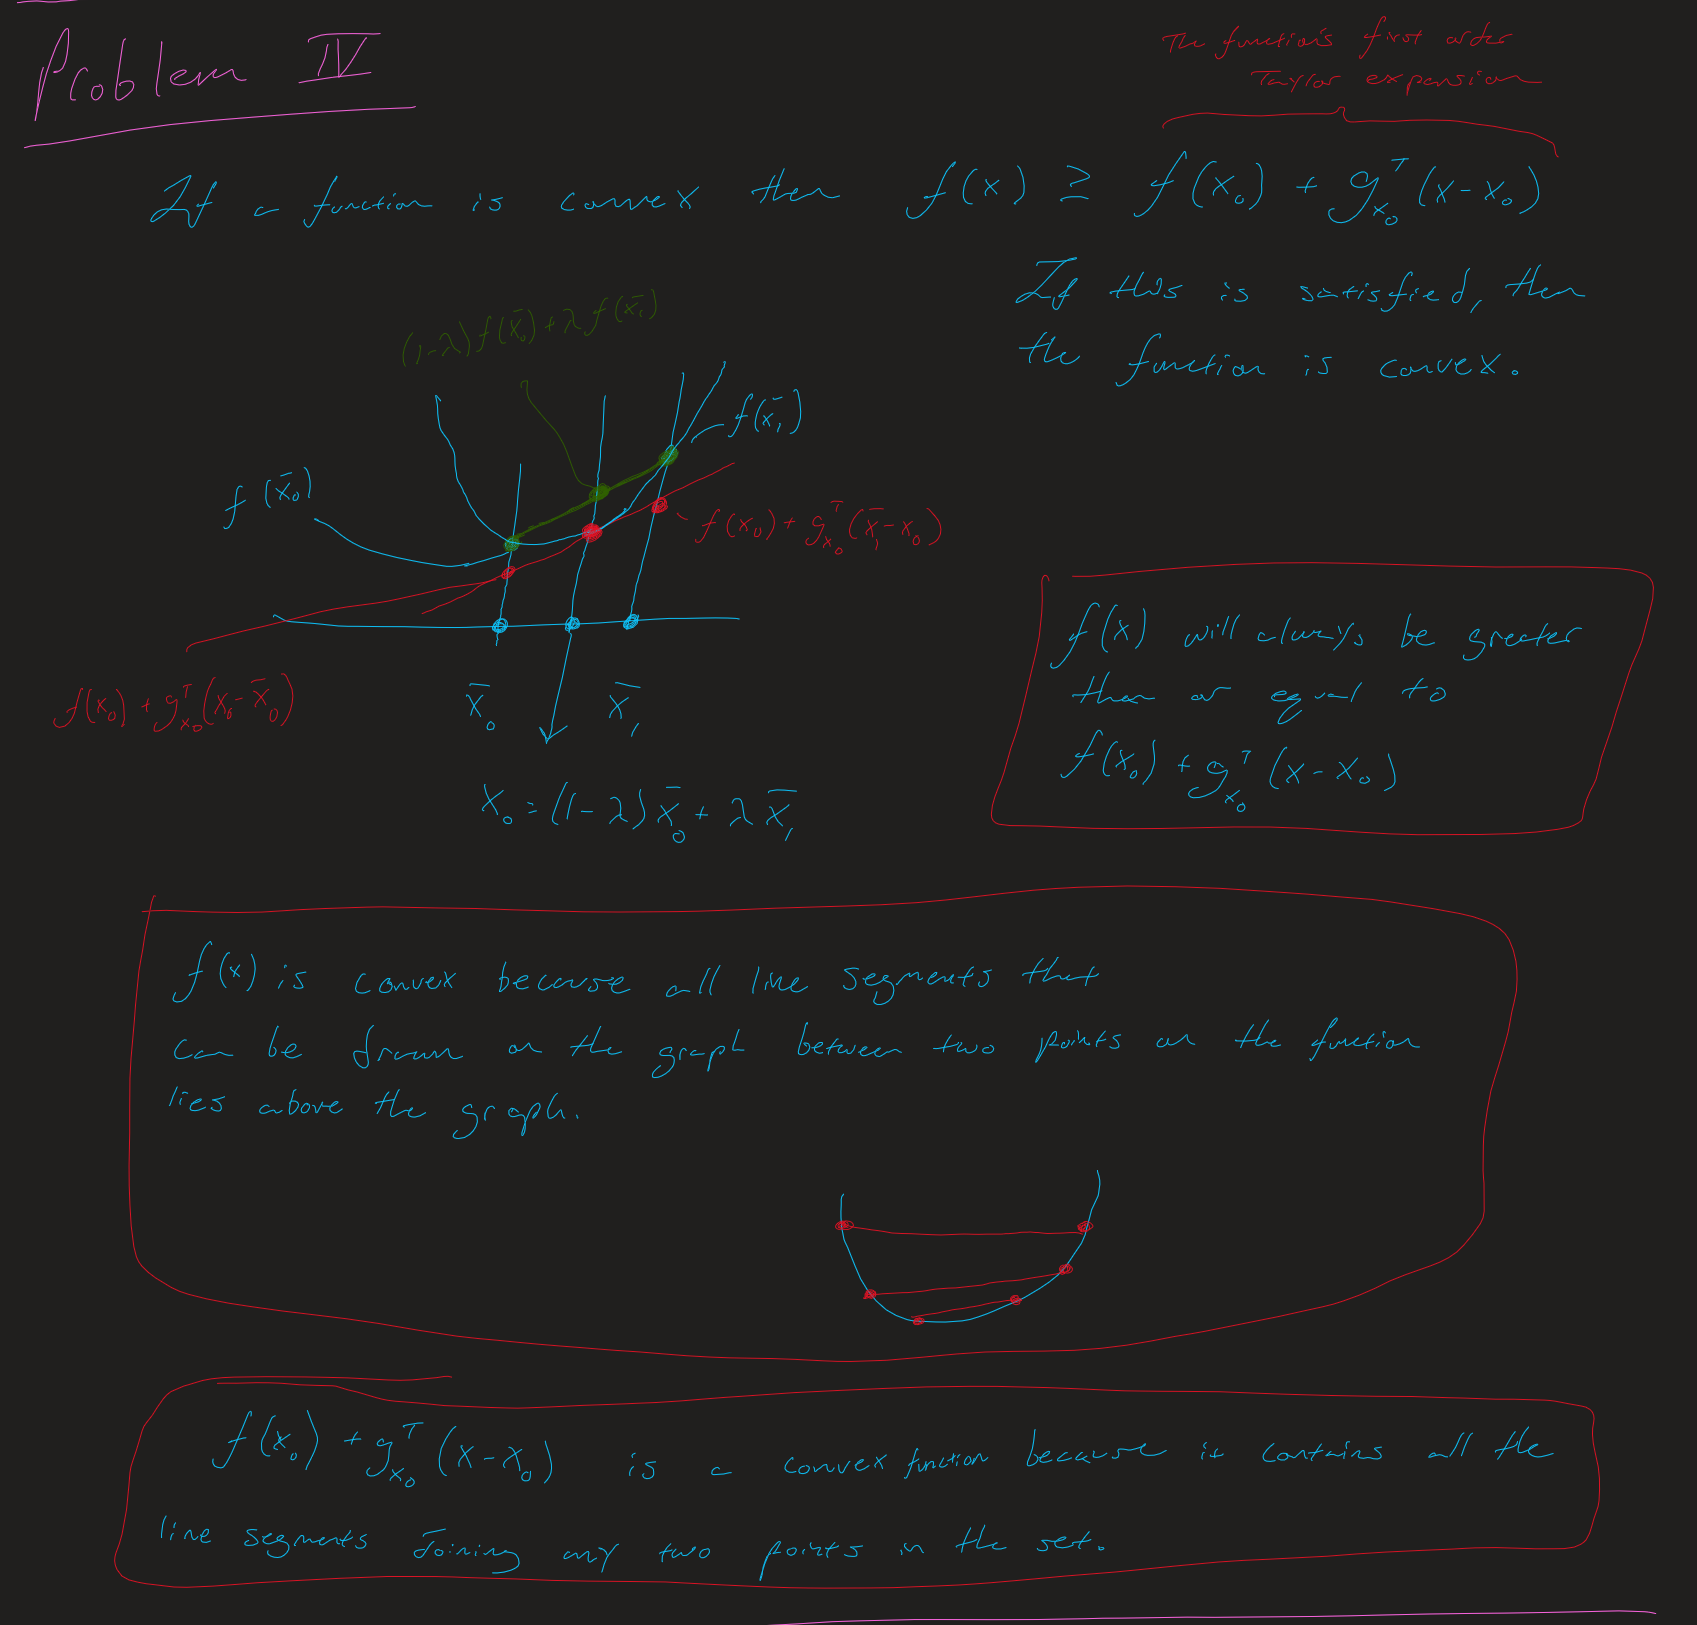

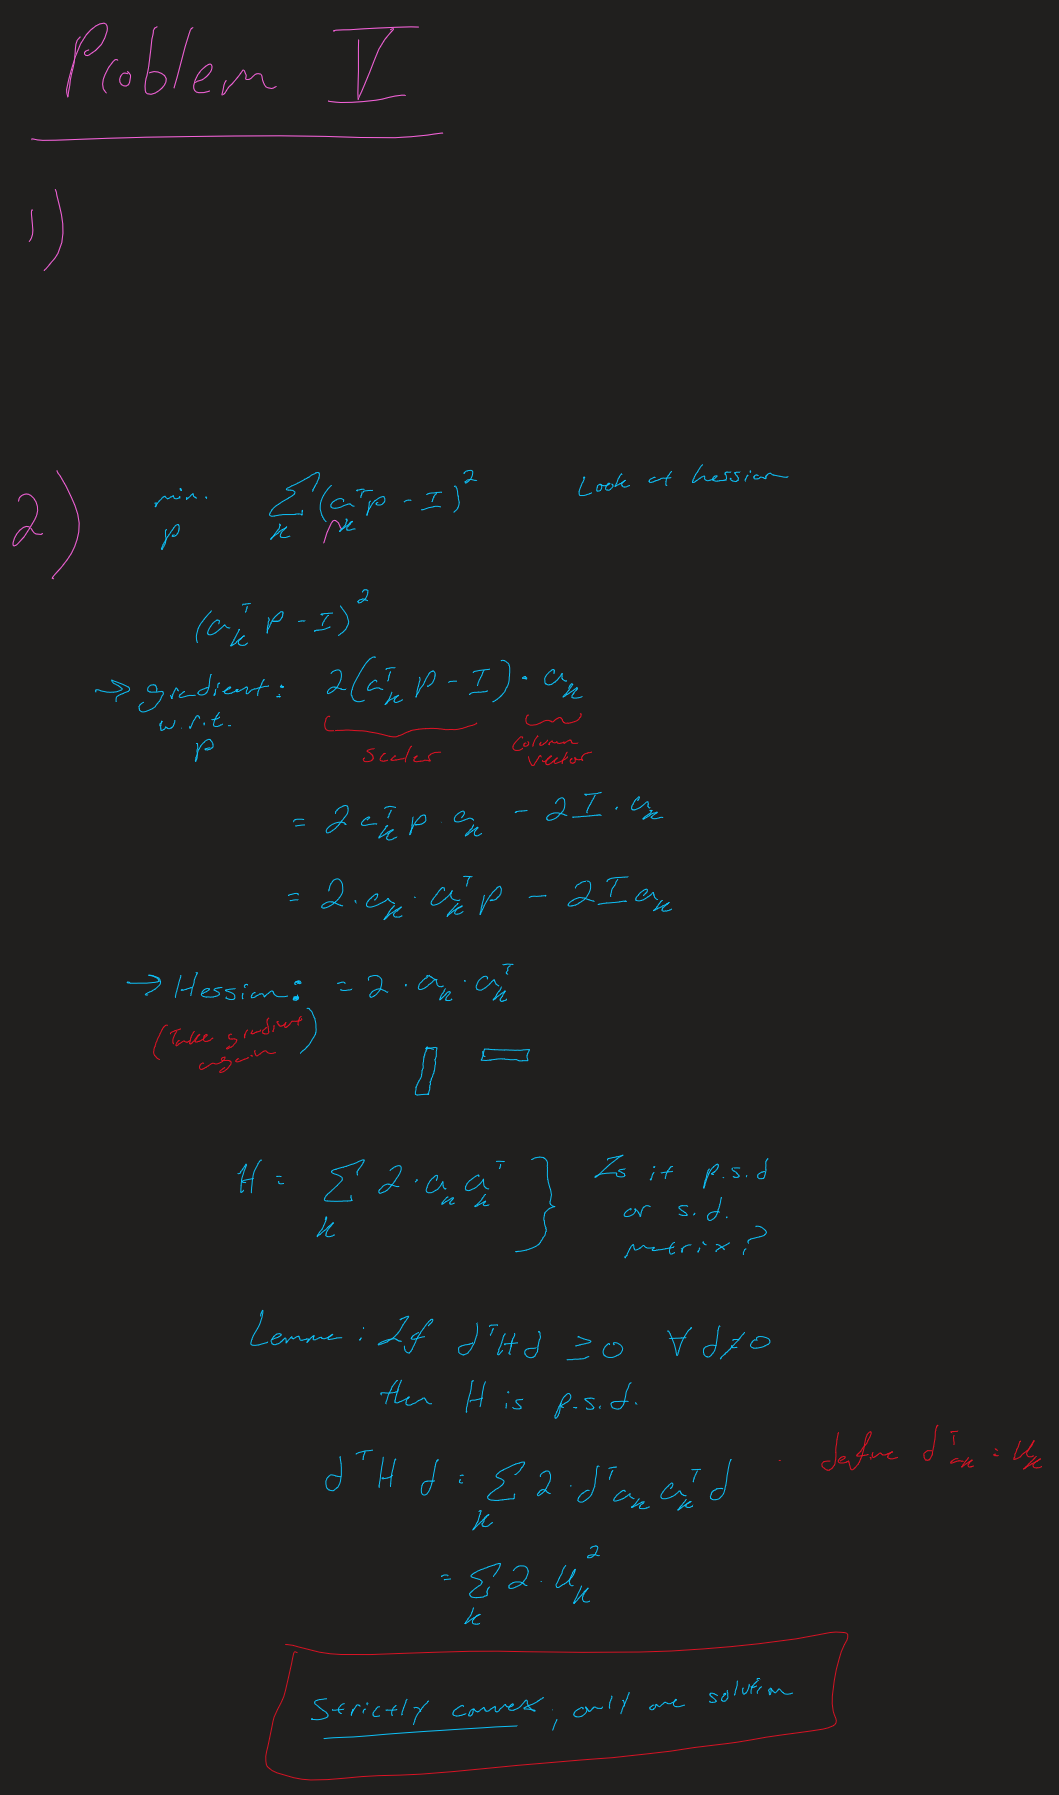